# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [154]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/sam/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


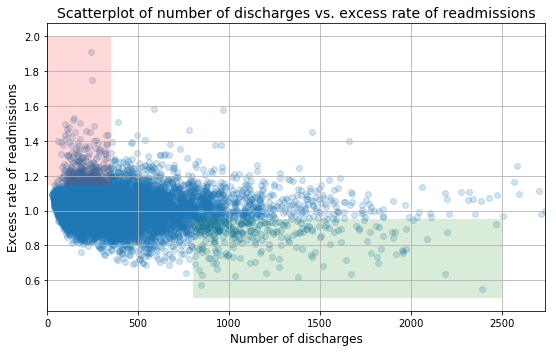

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

### Linear Regression Function

We can better visulaize the correlation between number of discharges(which represents hospital size) and the readmission ratio by using a linear regression line within the scatterplot.

We can see that the linear regression line has a **negative slope** which indicates a negative correlation between the number of discharges and the readmission ratio. 

We can quantify this relationship by computing the Pearson correlation coefficient.

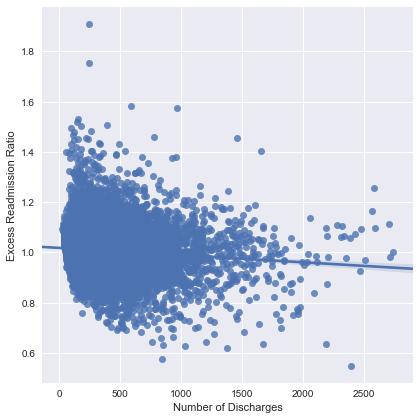

In [162]:
clean_hospital = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] <= 2740]
sns.lmplot(x='Number of Discharges',y='Excess Readmission Ratio',data=clean_hospital,size=6)

In [163]:
import numpy as np
corr_mat = np.corrcoef(x,y)
observed_statistic = corr_mat[0,1]
print('Pearson R coefficient:')
print(observed_statistic)

Pearson R coefficient:
-0.0930955428759


#### A. Initial Observation

The pearson correlation coefficient of the data calculated supports the intitial observation that the data is negatively correlated to some extent, i.e hospitals with higher number of discharges have a lower readmission ratio.

To further test this observation and eliminate the possibility of the data being correlated due to chance I will stimulate test of correlation using permutation resampling under the hypothesis that the data is not correlated using the pearson correlation coefficient as our test statistic to draw 100,000 permutation replicates.

In [164]:
#Generating 100,000 permutation replicates under the null hypothesis to get the p-value
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

test_stats = np.empty(100000)

for i in range(100000):
    x_perm = np.random.permutation(x)
    test_stats[i] = pearson_r(x_perm,y)

p_value = np.sum(test_stats <= observed_statistic) / len(test_stats)
print('P-value:')
p_value

P-value:


0.0

#### Conclusion: the p-value is extremely small (less than 0.01) and stastically significant which means we can reject our null hypothesis, the correlation is not due to chance.

In [67]:
#Function that returns the coordinates to plot an ecdf
def ecdf(data):
    
    n = len(data)
    
    x = np.sort(data)
    
    y = np.arange(1,n+1) / n
    
    return x,y

#Function that plots the ecdf 
def plot_ecdf(x,y):
    plt.plot(x,y, marker = '.',linestyle = 'none')


### Categorizing hospitals by their size  (number of dicharges ) to visualize the ECDFs of their Readmission Ratio

To visualize and understand the threshholds for hospital sizes that on average have an undesirable readmission ratio (>1), I will split the hospitals by the number of discharges into 4 separate categories(listed below) and plot their ECDF's on the same graph for comparison.

 - Hospitals with number of discharges less than 500
 - Hospitals with number of discharges more than 500 and less than 1000
 - Hospitals with number of discharges more than 1000 and less than 1500
 - Hospitals with number of discharges more than 1500
 

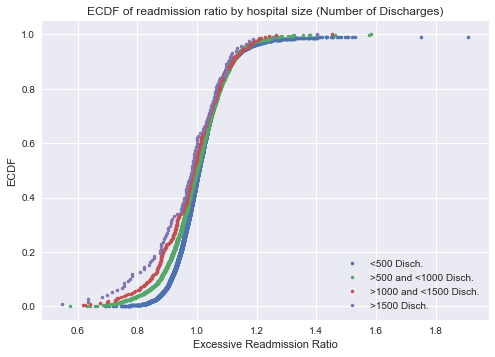

In [109]:
import seaborn as sns
sns.set()

#Hospitals with number of discharges less than 500
filter_500 = clean_hospital_read_df['Number of Discharges'] < 500
hospital_500 = clean_hospital_read_df.loc[filter_500]
array_500 = np.array(hospital_500['Excess Readmission Ratio'])
x_500,y_500 = ecdf(array_500)
_ = plot_ecdf(x_500,y_500)

#Hospitals with number of discharges more than 500 and less than 1000
filter_500_1000 = (clean_hospital_read_df['Number of Discharges'] >= 500) & (clean_hospital_read_df['Number of Discharges'] < 1000) 
hospital_500_1000 = clean_hospital_read_df.loc[filter_500_1000]
array_500_1000 = np.array(hospital_500_1000['Excess Readmission Ratio'])
x_500_1000,y_500_1000 = ecdf(array_500_1000)
_ = plot_ecdf(x_500_1000,y_500_1000)

#Hospitals with number of discharges more than 1000 and less than 1500
filter_1000_1500 = (clean_hospital_read_df['Number of Discharges'] >= 1000) & (clean_hospital_read_df['Number of Discharges'] < 1500) 
hospital_1000_1500 = clean_hospital_read_df.loc[filter_1000_1500]
array_1000_1500 = np.array(hospital_1000_1500['Excess Readmission Ratio'])
x_1000_1500,y_1000_1500 = ecdf(array_1000_1500)
_ = plot_ecdf(x_1000_1500,y_1000_1500)

#Hospitals with number of discharges more than 1500
filter_1500_g = (clean_hospital_read_df['Number of Discharges'] >= 1500) & (clean_hospital_read_df['Number of Discharges'] <= 2740) 
hospital_1500_g = clean_hospital_read_df.loc[filter_1500_g]
array_1500_g = np.array(hospital_1500_g['Excess Readmission Ratio'])
x_1500_g,y_1500_g = ecdf(array_1500_g)
_ = plot_ecdf(x_1500_g,y_1500_g)


plt.legend(('<500 Disch.','>500 and <1000 Disch.','>1000 and <1500 Disch.','>1500 Disch.'), loc='lower right')
plt.xlabel('Excessive Readmission Ratio')
plt.ylabel('ECDF')
plt.title('ECDF of readmission ratio by hospital size (Number of Discharges)')


**Conclusion:** From the plotted ECDF's we can see that the mean readmission ration for hospitals with number of discharges less than 500 is greater than one and the mean readmission ratio of hospitals with discharges more than 500 but less than 1000 is also very close behind the smaller hospitals. For a better and more precise analysis we will need to explore more closely.

The mean readmission ratio for hopsitals with number of discharges more than 1,000 seems to be slightly less than or equal to 1. Calculating their 95% confidence intervals will give us a better idea of the distribution of their means. 

###  95% Confidence Intervalls of the mean readmission ratio of hospitals of different sizes

I will calculate the 95% confidence intervals for the distribution of the mean readmission ratio for hospitals of different sizes using 100,000 boostrap replicates to getter perspective of the distribution of average readmission ratio for hospitals of different sizes.

In [167]:
array_500_s = pd.Series(array_500)
array_500_s = array_500_s.dropna()
array_500_clean = np.array(array_500_s)

bs_reps = np.empty(100000)
for i in range(100000):
    bs_resample = np.random.choice(array_500_clean,len(array_500_clean))
    bs_rep = np.mean(bs_resample)
    bs_reps[i] = bs_rep

print('95% CI for the mean readmission ratio for hospitals with less than 500 discharges:')    
print(np.percentile(bs_reps,[2.5,97.5]))

95% CI for the mean readmission ratio for hospitals with less than 500 discharges:
[ 1.00932546  1.01293658]


In [168]:
bs_reps = np.empty(100000)
for i in range(100000):
    bs_resample = np.random.choice(array_500_1000,len(array_500_1000))
    bs_rep = np.mean(bs_resample)
    bs_reps[i] = bs_rep
    
print('95% CI for the mean readmission ratio for hospitals with more than 500 but less than 1000 discharges:')
print(np.percentile(bs_reps,[2.5,97.5]))

95% CI for the mean readmission ratio for hospitals with more than 500 but less than 1000 discharges:
[ 0.99440813  1.003205  ]


In [169]:
bs_reps = np.empty(100000)
for i in range(100000):
    bs_resample = np.random.choice(array_1000_1500,len(array_1000_1500))
    bs_rep = np.mean(bs_resample)
    bs_reps[i] = bs_rep

print('95% CI for the mean readmission ratio for hospitals with more than 1000 but less than 1500 discharges:')
print(np.percentile(bs_reps,[2.5,97.5]))

95% CI for the mean readmission ratio for hospitals with more than 1000 but less than 1500 discharges:
[ 0.97127813  0.99541895]


In [170]:
bs_reps = np.empty(100000)
for i in range(100000):
    bs_resample = np.random.choice(array_1500_g,len(array_1500_g))
    bs_rep = np.mean(bs_resample)
    bs_reps[i] = bs_rep

print('95% CI for the mean readmission ratio for hospitals with more than 1500 discharges:')
print(np.percentile(bs_reps,[2.5,97.5]))

95% CI for the mean readmission ratio for hospitals with more than 1500 discharges:
[ 0.94216693  0.98979498]


**Conclusion:** From the confidence intervals above we can see that the 95% of mean readmission ratio for hospitals with less than 500 discharges lie above the desirable ratio ( i.e are > 1) and the mean readmission ratio for hospitals with  more than 500 but with less than 1000 discharges lies extremely close to 1 or more than the desirable ratio(>1). This indicates a very small difference between the means of both the aformetioned groups and since these values lie very close to the edge of the desirable ratio we will need a p-value test to confirm if this difference is true or due to chance.

For hospitals with more than 1000 discharges, 95% of the mean readmission ratio lies below 1 (i.e in the desirable range of < 1)

Overall, the true difference in the mean readmission ratio for all groups of hospitals is extremely small.

### Hypothesis testing 

**Null Hypothesis:** The mean readmission ratio for hospitals with less than 500 discharges and hospitals with more than 500 but less than 1000 discharges is the same.<br>
**Alternative hypothesis:** The difference in the mean readmission ratio of hospitals with less than 500 discharges and the mean readmission ratio for hospitals with more than 500 but less than 1000 discharges is not due to chance.

Using the difference in mean as the t-statistic I will stimulate the collection of data under the null hypothesis(by generating 100,000 boostrap replicates) to calculate the p-value to test our hypothesis if the difference in the mean readmission ratio of hospital with less than 500 discharges and the mean readmission ratio of hospitals with more than 500 but less than 1000 discharges is due to chance.

In [150]:
#Function that returns a specified boostrap replicate
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

#Function that generates specified number of boostrap replicates
def draw_bs_reps(data, func, size=1):
    
    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

#Computing the observed difference between the means
observed_statistic = np.mean(array_500_clean) - np.mean(array_500_1000)

#Getting the combined mean 
combined_array = np.concatenate((array_500_clean,array_500_1000),axis=0)
combined_mean = np.mean(combined_array)

#Shifting the means 
sh_array_500 = array_500_clean - np.mean(array_500_clean) + combined_mean
sh_array_500_1000 = array_500_1000 - np.mean(array_500_1000) + combined_mean

#Stimulating the collection of the data under the null hypothesis 
array_500_reps = draw_bs_reps(sh_array_500,np.mean,100000)
array_500_1000_reps = draw_bs_reps(sh_array_500_1000,np.mean,100000)

#Computing the test_statistic: Difference in means
t_stats = array_500_reps - array_500_1000_reps

#Computing the p-value 
p_value = np.sum(t_stats >= observed_statistic)/len(t_stats)

print('P-value:')
print(p_value)

P-value:
0.0


**Conclusion:** Our p-value is extremely small (>0.01), which means that under the null hypothesis the stimulated difference in the means of both the groups of hospitals was as extreme as the actual difference in the means of both the groups of hospital less than 1% of the time. We can conclude that this actual difference is not due to chance.

### Analysis Report

#### Statistical Report 
There is a negative correlation between the number of discharges and the hospital readmission ratio. Hospitals with lower number of discharges on average have a higher readmission ratio than hospitals with greater number of discharges
 - Hospitals with less than 500 discharges on average tend to have a higher readmission ratio than 1
 - Hospitals with more than 500 but less than 1000 discharges on average may or not have a readmission ratio higher than 1
 - Hospitals with more than 1000 discharges on average tend to have a readmssion ratio lower than 1


**This statistical significance does not imply that all hospitals with less than 500 discharges have a readmission ratio higher than 1 or all hospitals with more than 1000 discharges have a readmission ratio less than 1. ** <br>

#### Conclusion/Recommendation
Even though the size of a hospital may or may not contribute to a hospital's readmission ratio being more or less than 1, the real difference in the mean readmission ratio of hospital with different sizes is not large enough to consider allocation of resources for consolidation of hospitals to have fewer of them with higher number of discharges, practical.

It would be more practical to allocate incentives and funds to hospitals with readmission ratio significantly higher than 1 to help them reduce their readmission ratio , with priority given to hospital with fewer than 500 discharges as they may lack the resources to ensure quality care in the short run.